In [ ]:
import pandas as pd

clima = pd.read_csv('https://github.com/paulosalvatore/Ocean_Python_VisualizacaoDados_11_08_20/raw/master/MaterialApoio/clima.csv')
clima = clima.rename(columns={' vento_rajada': 'vento_rajada'})

In [ ]:
clima

,codigo_estacao,data,hora,temp_inst,temp_max,temp_min,umid_inst,umid_max,umid_min,pto_orvalho_inst,pto_orvalho_max,pto_orvalho_min,pressao,pressao_max,pressao_min,vento_vel,vento_direcao,vento_rajada,radiacao,precipitacao
0,A101,05/03/2020,0,28.6,30.6,28.5,71,72,60,22.9,23.0,22.0,1004.9,1004.9,1003.6,1.4,52,6.7,0.000,0.0
1,A101,05/03/2020,1,28.3,28.9,28.3,70,71,67,22.3,23.0,22.1,1005.5,1005.5,1004.9,0.4,205,3.0,0.000,0.0
2,A101,05/03/2020,2,26.8,29.2,26.8,82,82,69,23.5,24.2,22.4,1006.9,1006.9,1005.5,2.8,120,7.9,0.000,0.0
3,A101,05/03/2020,3,25.8,26.8,25.8,86,88,82,23.3,23.7,23.3,1006.7,1006.9,1006.5,0.7,104,5.4,0.000,0.0
4,A101,05/03/2020,4,25.7,26.0,25.5,88,89,86,23.6,23.9,23.3,1006.1,1007.0,1006.1,0.2,13,2.9,0.000,0.0
5,A101,05/03/2020,5,25.7,26.0,25.5,89,90,87,23.6,23.9,23.6,1005.4,1006.1,1005.4,0.4,278,2.7,0.000,0.2
6,A101,05/03/2020,6,26.0,26.0,25.5,88,90,88,23.8,23.9,23.6,1005.3,1005.5,1005.2,1.5,109,3.4,0.000,0.0
7,A101,05/03/2020,7,25.7,26.0,25.6,89,90,88,23.8,24.0,23.8,1004.6,1005.3,1004.6,1.4,107,4.3,0.000,0.0
8,A101,05/03/2020,8,26.0,26.0,25.6,87,90,87,23.7,23.9,23.7,1004.7,1004.7,1004.5,1.2,67,4.7,0.000,0.2
9,A101,05/03/2020,9,25.7,26.0,25.7,87,88,86,23.4,23.7,23.4,1005.2,1005.3,1004.7,0.4,50,2.8,0.000,0.0


In [ ]:
import plotly.offline as ply
import plotly.graph_objs as go

ply.init_notebook_mode(connected=True)

In [ ]:
# Devido o Plotly estar sendo utilizado no Google Colab, precisaremos definir
# a função abaixo e chamá-la sempre que quisermos exibir um gráfico

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))
  ply.init_notebook_mode(connected=True)

In [ ]:
configure_plotly_browser_state() # Específico para o Colab

bar = go.Bar(x=clima.hora, y=clima.precipitacao)
ply.iplot([bar])



In [ ]:
configure_plotly_browser_state() # Específico para o Colab

umid_max = go.Bar(x=clima.hora, y=clima.umid_max, name='Umid. Máxima', marker={'color': '#9770E0'})
umid_min = go.Bar(x=clima.hora, y=clima.umid_min, name='Umid. Mínima')

data = [umid_max, umid_min]

ply.iplot(data)

In [ ]:
configure_plotly_browser_state() # Específico para o Colab

vento_vel = go.Bar(x=clima.hora, y=clima.vento_vel, name='Normal', marker={'color': '#feca57'})
vento_rajada = go.Bar(x=clima.hora, y=clima.vento_rajada, name='Rajada', marker={'color': '#000fff'})

data = [vento_vel, vento_rajada]

layout = go.Layout(
    title='Velocidade do Vento (com Rajadas)',
    xaxis={'title': 'Hora do Dia'},
    yaxis={'title': 'Velocidade (km/h)'},
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)

ply.iplot(fig)

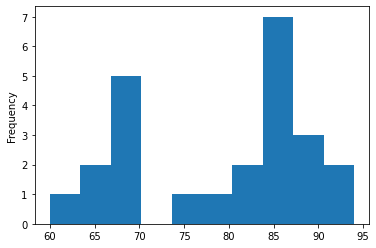

In [ ]:
clima.umid_min.plot.hist()

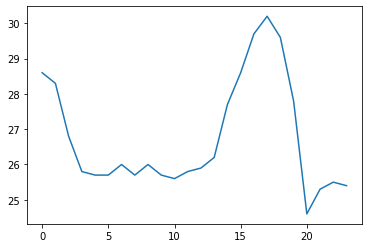

In [ ]:
clima.temp_inst.plot.line()


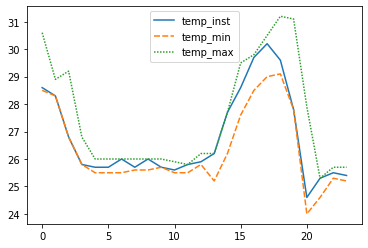

In [ ]:
import seaborn as sns

sns.lineplot(data=[clima.temp_inst, clima.temp_min, clima.temp_max])


In [ ]:
configure_plotly_browser_state() # Específico para o Colab

temp_min = go.Bar(x=clima.hora, y=clima.temp_min, name='Temperatura Mínima')
temp_max = go.Bar(x=clima.hora, y=clima.temp_max, name='Temperatura Máxima')
temperatura = go.Scatter(x=clima.hora, y=clima.temp_inst, mode='markers+lines', name='Temperatura')

data = [temp_min, temp_max, temperatura]

layout = go.Layout(
    title='Temperatura ao longo do dia',
    xaxis={'title': 'Hora do Dia'},
    yaxis={'title': 'Temperatura (ºC)'},
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
fig.update_layout(title_x=0.5)

ply.iplot(fig)

fig.write_html('grafico.html')


In [ ]:
colunas = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

iris = pd.read_csv('https://raw.githubusercontent.com/paulosalvatore/Ocean_CienciaDados_24_02_2021/main/dataset/iris.data', names=colunas)

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


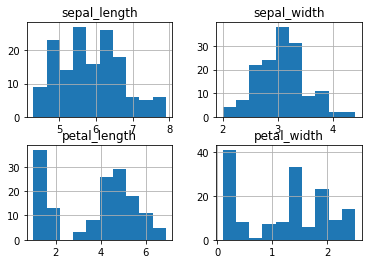

In [ ]:
iris.hist();

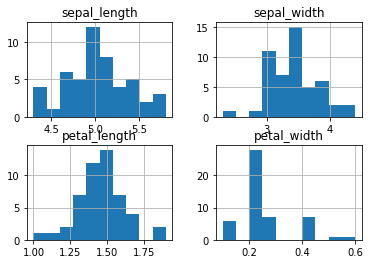

In [ ]:
iris[iris['class'] == 'Iris-setosa'].hist();

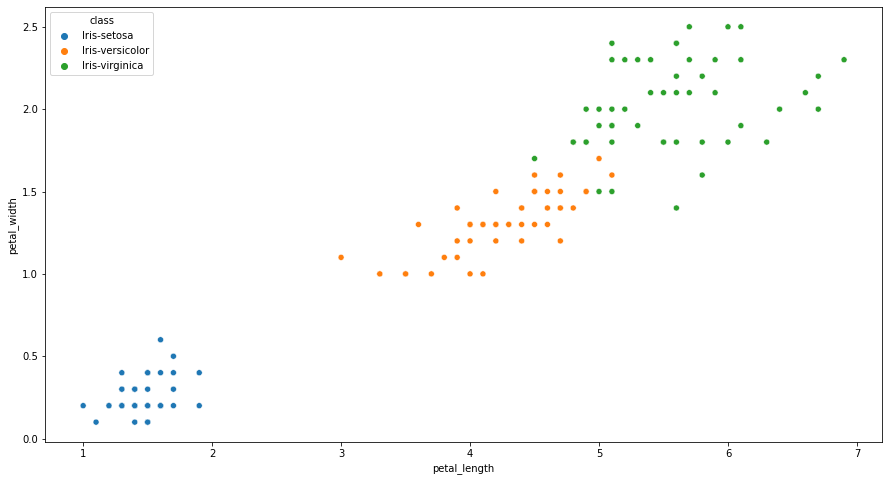

In [ ]:
import matplotlib.pyplot as plt

fig = plt.subplots(figsize=(15, 8))

sns.scatterplot(x='petal_length', y='petal_width', data=iris, hue='class');

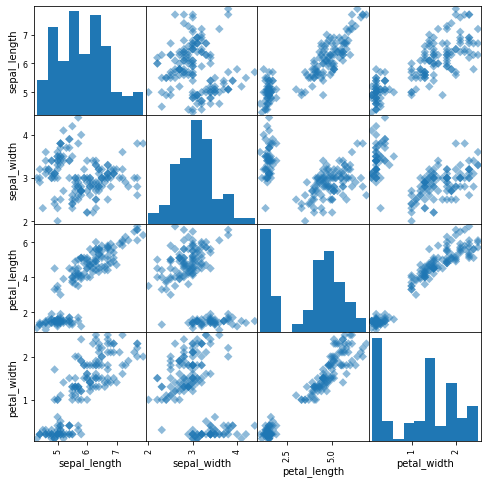

In [ ]:
pd.plotting.scatter_matrix(iris, figsize=(8,8),marker='D');



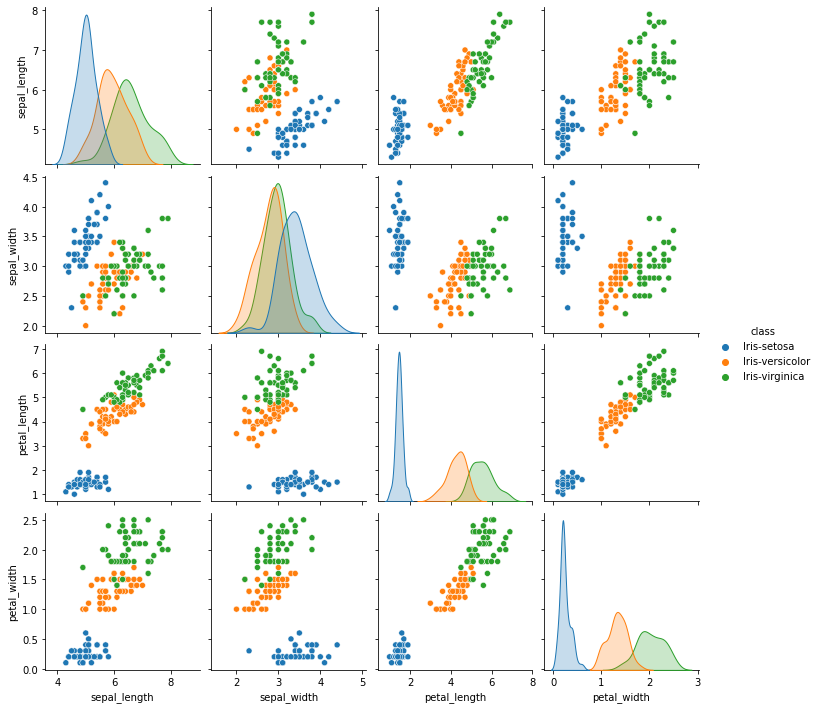

In [ ]:
sns.pairplot(iris, hue='class')